In [499]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [500]:
def load_normed_sentiment(path_to_load):
    file_names=list(set(os.listdir(path_to_load)))
    sentiment_matrix=[]
    index_filename_dict={}
    index=0
    for file_name in file_names:
        sentiment=pd.read_csv(path_to_load+file_name).values
        sentiment=sentiment.ravel()
        sentiment_matrix.append(sentiment)
        index_filename_dict[index]=file_name
        index+=1
    return sentiment_matrix,index_filename_dict

In [501]:
def ClusterIndices_group(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [502]:
def K_means_for_normed_sentiment(sentiment_matrix,cluster_number):
    X=np.array(sentiment_matrix)
    kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(X)
    clustered_full_sentiment_maxtrix=[]
    cluslter_index_list=[]
    for num in range(cluster_number):
        cluslter_index=ClusterIndices_group(num,kmeans.labels_)
        cluslter_index_list.append(cluslter_index)
        cluster_sentiment_maxtrix= [sentiment_matrix[i] for i in cluslter_index]
        clustered_full_sentiment_maxtrix.append(cluster_sentiment_maxtrix)
    return cluslter_index_list,clustered_full_sentiment_maxtrix,kmeans.cluster_centers_

In [503]:
def draw_clusters(clustered_full_sentiment_maxtrix,kmeans_cluster_centers):
    cluster_num=len(kmeans_cluster_centers)
    fig,ax=plt.subplots(cluster_num,figsize=(5,20))
    fig.tight_layout()
    for i in range(cluster_num):
        cluster_sentiment_matrix=clustered_full_sentiment_maxtrix[i]
        print len(cluster_sentiment_matrix)
        for file_sentiment in cluster_sentiment_matrix:
                file_sentiment=np.asarray(file_sentiment).ravel()
                ax[i].plot(file_sentiment,color='lightgrey',linewidth=0.2)
        ax[i].plot(kmeans_cluster_centers[i],color='orangered')
        ax[i].set_xlabel('time')
        ax[i].set_ylabel('sentiment')
    if not os.path.exists('../data/k_means_result'):
        os.mkdir('../data/k_means_result')
    plt.savefig('../data/k_means_result/sentiment_imsdb_springField.png', dpi=300)
    plt.show()
    



In [504]:
def save_k_group_movie_names(index_filename_dict,cluslter_index_list):
    num=1
    np.save('../data/k_means_result/movie_name_array',index_filename_dict.values())
    for cluslter_index in cluslter_index_list:
        movie_name_cluster=[]
        for one_index_movie in cluslter_index:
            movie_name_cluster.append(index_filename_dict.get(one_index_movie))
        np.save('../data/k_means_result/movie_name_cluster/'+str(num),movie_name_cluster)
        #with open('../data/k_means_result/movie_name_cluster_'+str(num)+'.txt', 'w') as filehandle:  
         #   filehandle.write('%s\n' % movie_name_cluster) 
        num+=1

1116
721
947
708
915
873


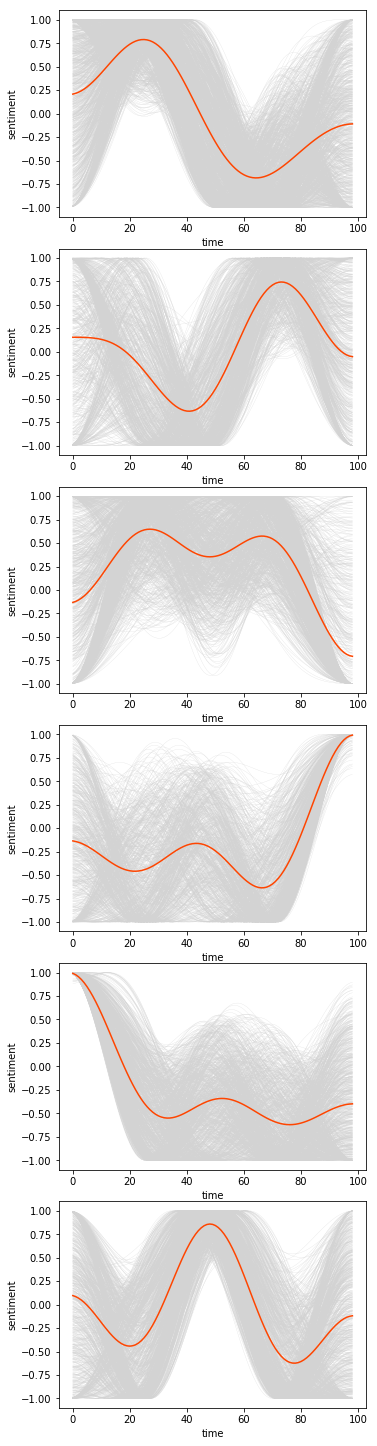

In [508]:
if __name__ == "__main__":
    path_to_load='../data/normed_sentiment_10K_2/'
    sentiment_matrix,index_filename_dict=load_normed_sentiment(path_to_load)
    cluslter_index_list,clustered_full_sentiment_maxtrix,kmeans_cluster_centers=K_means_for_normed_sentiment(sentiment_matrix,6)
    draw_clusters(clustered_full_sentiment_maxtrix,kmeans_cluster_centers)
    save_k_group_movie_names(index_filename_dict,cluslter_index_list)
    pd.DataFrame.from_dict(index_filename_dict,orient ='index').to_csv('../data/k_means_result/index_filename_dict_imsdb_springFiled.csv')

In [506]:
path_to_load

'../data/normed_sentiment_10K/'